In [38]:
import pandas as pd 
data = pd.read_csv('kredi_karti_basvurulari.csv', delimiter = ';')
df = pd.DataFrame(data)

print(df.head(5))
print('-------------------------------------------------------------')
print(df.info())
print('-------------------------------------------------------------')
print(df.describe())
print('-------------------------------------------------------------')
print(df.isnull().sum())

   application_id  age  income  credit_score
0               1   25   30000           600
1               2   34   30000           600
2               3   34   30000           600
3               4   34   30000           600
4               5   34   30000           600
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   application_id  100 non-null    int64
 1   age             100 non-null    int64
 2   income          100 non-null    int64
 3   credit_score    100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB
None
-------------------------------------------------------------
       application_id         age        income  credit_score
count      100.000000  100.000000    100.000000    100.000000
mean        50.500000   39.190000  42200.000000    648.000000
std         29.0

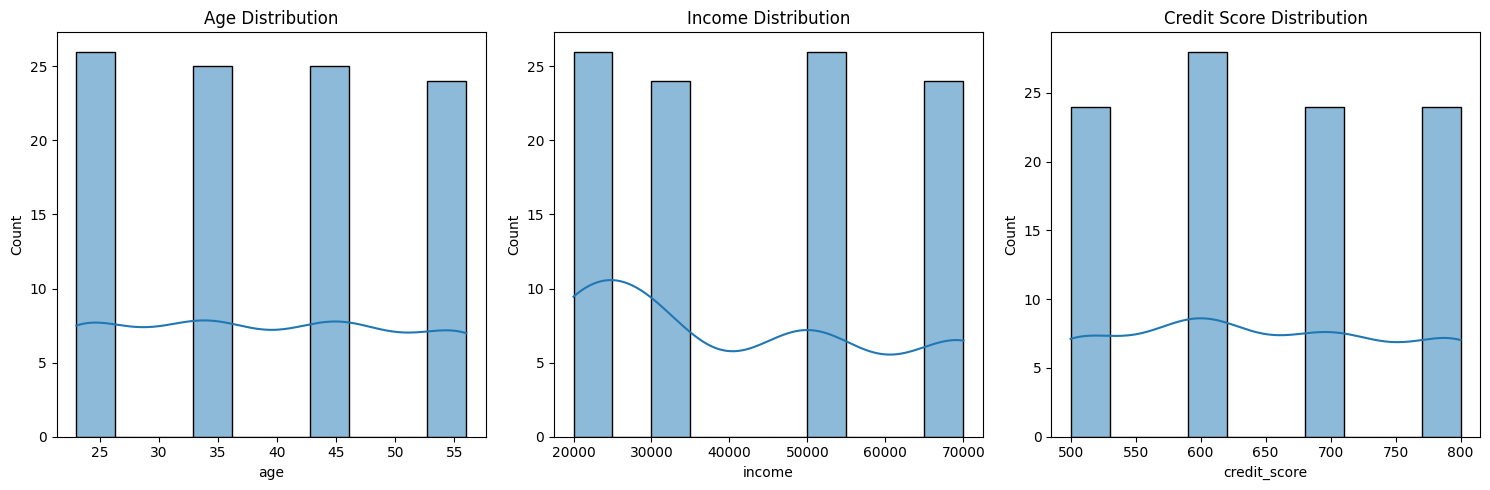

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["age"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["income"], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Income Distribution")

sns.histplot(df["credit_score"], bins=10, kde=True, ax=axes[2])
axes[2].set_title("Credit Score Distribution")

plt.tight_layout()
plt.show()

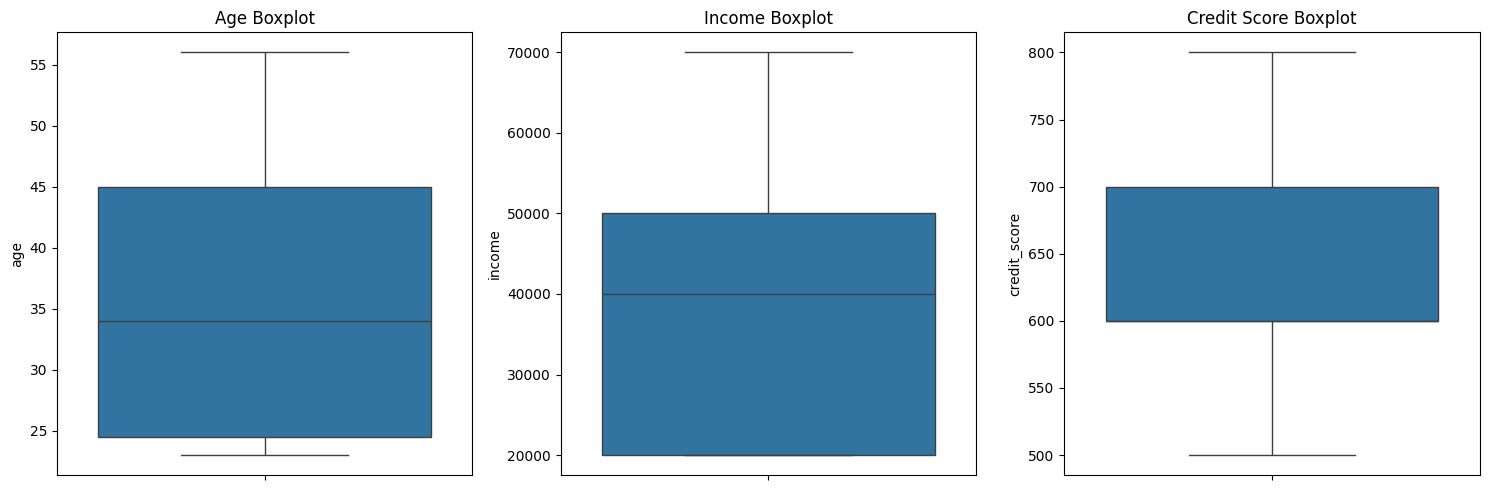

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["age"], ax=axes[0])
axes[0].set_title("Age Boxplot")

sns.boxplot(y=df["income"], ax=axes[1])
axes[1].set_title("Income Boxplot")

sns.boxplot(y=df["credit_score"], ax=axes[2])
axes[2].set_title("Credit Score Boxplot")

plt.tight_layout()
plt.show()

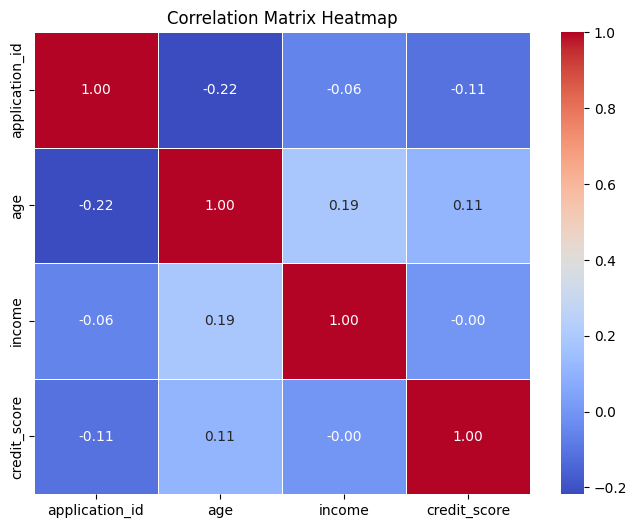

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

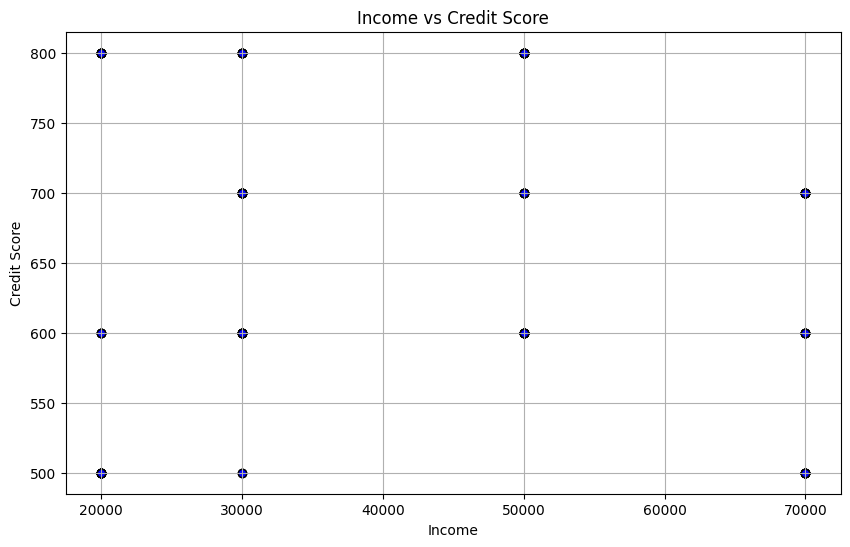

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['credit_score'], color='blue', edgecolor='black')
plt.title('Income vs Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

Mean Absolute Error: 95.78
R-squared Score: -0.02


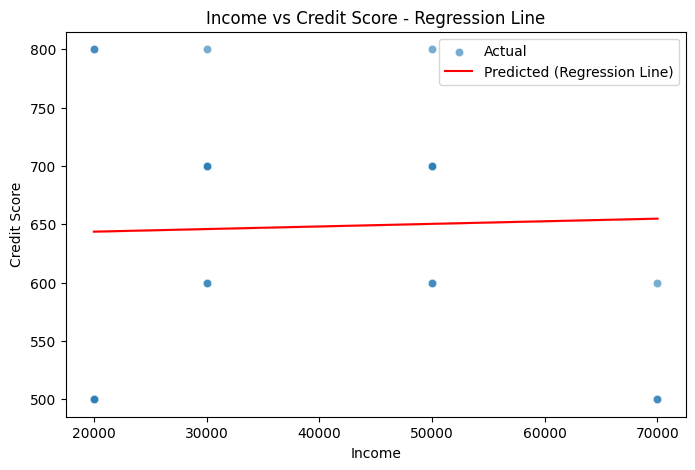

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['income']]  
y = df['credit_score']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['income'], y=y_test, label="Actual", alpha=0.6)
sns.lineplot(x=X_test['income'], y=y_pred, color="red", label="Predicted (Regression Line)")
plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.title("Income vs Credit Score - Regression Line")
plt.legend()
plt.show()